## making powerlaw plots each year
Could not find a powerlaw library for d3. Using static plots from python

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import operator
import collections
import powerlaw


from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx



pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/unhcr_time_series_normalized.csv")
df = df[df['type']=="Refugees (incl. refugee-like situations)"]




In [3]:
def make_plots(year):
    df = pd.read_csv("../data/unhcr_time_series_normalized.csv")
    df = df[df['type']=="Refugees (incl. refugee-like situations)"]
    df = df[df['year']==year]
    inflow = df.groupby(['destination'])['value'].sum().reset_index().sort_values("value", ascending=False)
    inflow_values = inflow.value.tolist()

    outflow = df.groupby(['origin'])['value'].sum().reset_index().sort_values("value", ascending=False)
    outflow_values = outflow.value.tolist()

#    plt.figure(figsize=(18,8));

    fit = powerlaw.Fit(np.array(inflow_values)+1,xmin=1,discrete=False)
    alpha = fit.power_law.alpha.astype(str)[0:6]
    fit.power_law.plot_ccdf( color= 'b',linestyle='--',label='fit ccdf')
    fit.plot_ccdf( color= 'r')
    plt.title(str(year)+' Destination of Refugees')
    plt.xlabel('In k = Number of refugees')
    plt.ylabel('Complementary CDF '+ r'$P(X\geq k)$')
    lables = [r'$\alpha =$'+alpha, "Empirical data"]
    plt.legend(lables, loc='best', fontsize = 'small')
    

    fit = powerlaw.Fit(np.array(outflow_values)+1,xmin=1,discrete=False)
    alpha = fit.power_law.alpha.astype(str)[0:6]
    fit.power_law.plot_ccdf( color= 'b',linestyle='--',label='fit ccdf')
    fit.plot_ccdf( color= 'r')
    plt.title(str(year)+' Origin of Refugees')
    plt.xlabel('Out k = Number of refugees')
    plt.ylabel('Complementary CDF '+ r'$P(X\geq k)$')
    lables = [r'$\alpha =$'+alpha, "Empirical data"]
    plt.legend(lables, loc='best', fontsize = 'small')

    plt.savefig('../Visualization/src/media/'+str(year)+'_powerlaw.png')

    plt.show()


In [4]:
years = list(set(df.year.tolist()))
years

[2016, 2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

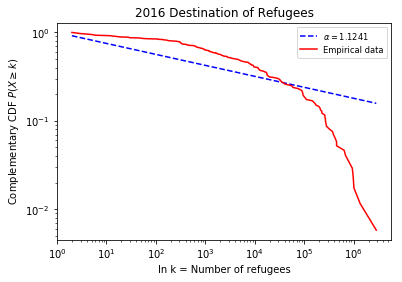

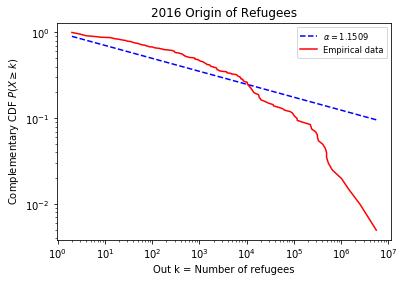

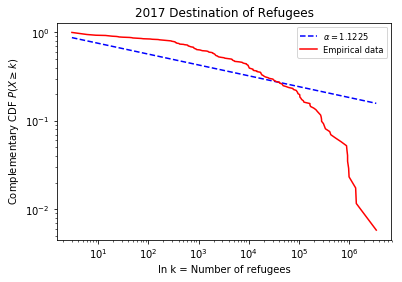

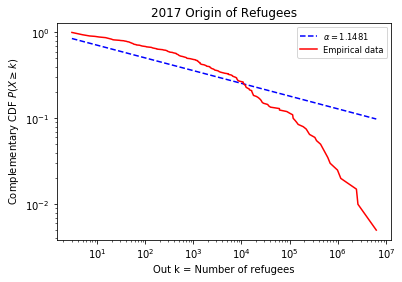

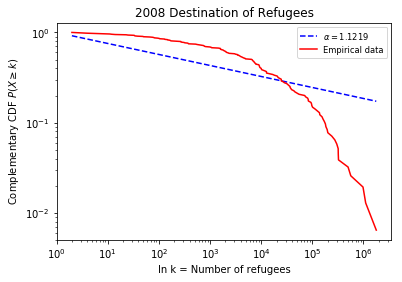

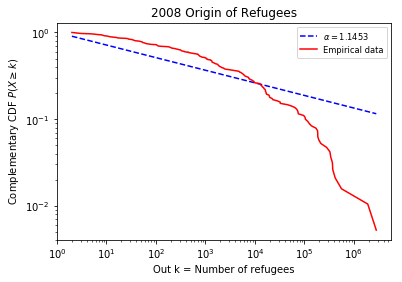

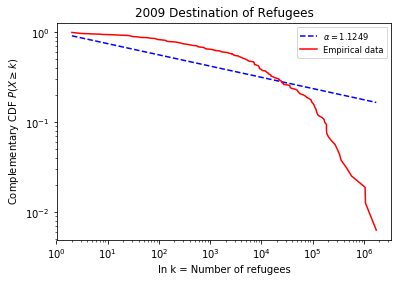

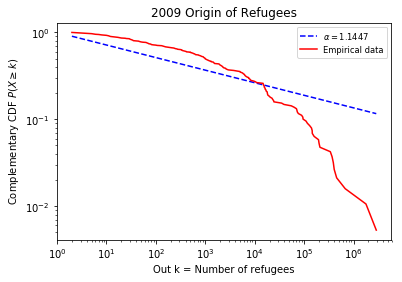

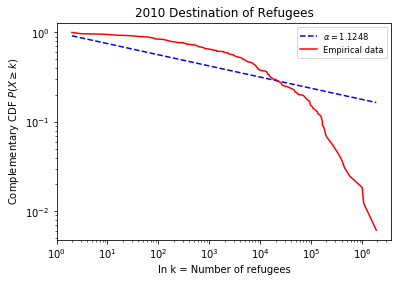

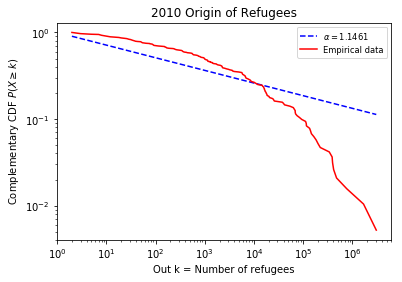

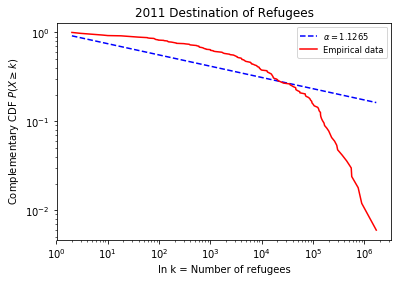

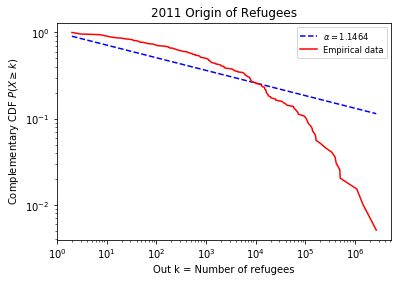

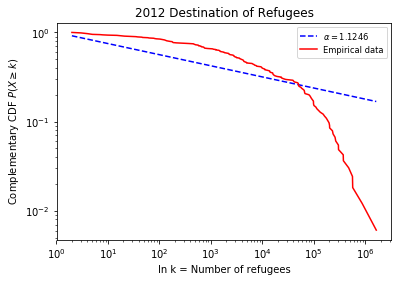

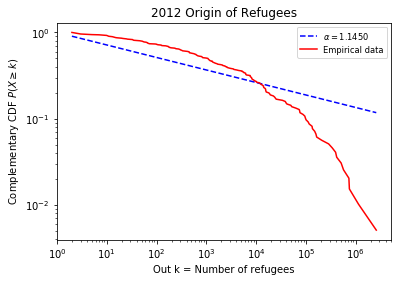

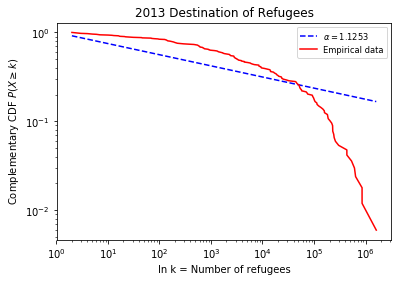

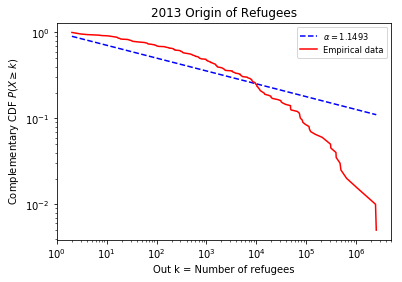

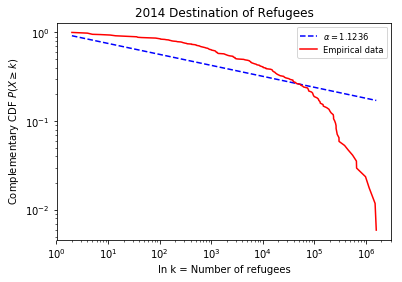

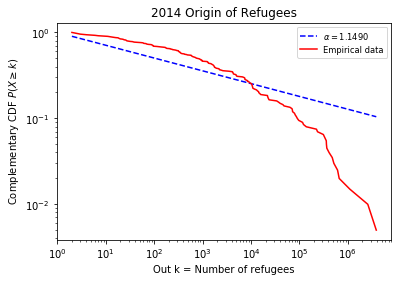

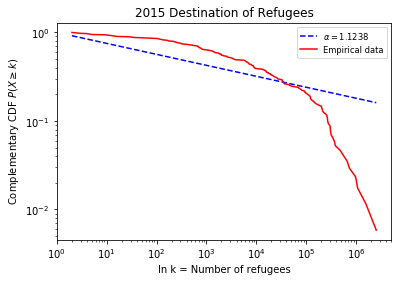

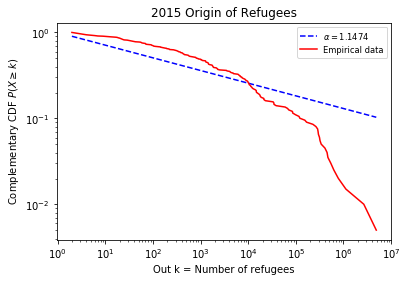

In [5]:
for year in years:
    make_plots(year)
